# Predição de Série Temporal

**Questão 4 -** Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo,
até predição de três passos, da série temporal: x(n) = sen
2
(n) + cos(n+cos(n)). Avalie o desempenho mostrando para cada caso os erros de predição.

Dica: Para auxiliar na resolução desse problema você pode usar K entradas (por exemplo,
K=10), que correspondem a K passos anteriores a n: x(n-1), x(n-2),..., x(n-K), e deve fazer a
predição dos valores x(n+1), x(n+2) e x(n+3).

#### Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from data_generator import generate_data

#### Importando os Dados

In [3]:
df = generate_data(4000, 10, 3)
df.shape

(4000, 13)

In [4]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y1,y2,y3
0,0.540302,0.738563,0.813765,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832,1.249658
1,0.738563,0.813765,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832,1.249658,0.404245
2,0.813765,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832,1.249658,0.404245,0.981733
3,-0.405311,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832,1.249658,0.404245,0.981733,0.319912
4,-0.406359,1.460239,0.857538,0.531544,0.978311,-0.062893,-0.669434,1.008832,1.249658,0.404245,0.981733,0.319912,-0.703644


In [5]:
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']].values
y = df[['y1', 'y2', 'y3']].values
X


array([[ 0.54030231,  0.73856271,  0.81376534, ...,  0.53154379,
         0.97831141, -0.06289252],
       [ 0.73856271,  0.81376534, -0.40531079, ...,  0.97831141,
        -0.06289252, -0.66943422],
       [ 0.81376534, -0.40531079, -0.40635904, ..., -0.06289252,
        -0.66943422,  1.00883171],
       ...,
       [ 0.65833548,  0.89343415, -0.28648118, ...,  0.998377  ,
         0.07937374, -0.70747672],
       [ 0.89343415, -0.28648118, -0.53256708, ...,  0.07937374,
        -0.70747672,  0.7884467 ],
       [-0.28648118, -0.53256708,  1.32195137, ..., -0.70747672,
         0.7884467 ,  1.38172454]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='tanh'))

In [9]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=50, verbose=2)

Epoch 1/500
52/52 - 9s - loss: 3.3440 - accuracy: 0.4645 - val_loss: 2.9611 - val_accuracy: 0.4844 - 9s/epoch - 165ms/step
Epoch 2/500
52/52 - 0s - loss: 2.7713 - accuracy: 0.4883 - val_loss: 2.3995 - val_accuracy: 0.5219 - 223ms/epoch - 4ms/step
Epoch 3/500
52/52 - 0s - loss: 1.9258 - accuracy: 0.4406 - val_loss: 1.4818 - val_accuracy: 0.4047 - 246ms/epoch - 5ms/step
Epoch 4/500
52/52 - 0s - loss: 1.4928 - accuracy: 0.4102 - val_loss: 1.2992 - val_accuracy: 0.4141 - 233ms/epoch - 4ms/step
Epoch 5/500
52/52 - 0s - loss: 1.1185 - accuracy: 0.4836 - val_loss: 0.8002 - val_accuracy: 0.5766 - 216ms/epoch - 4ms/step
Epoch 6/500
52/52 - 0s - loss: 0.9027 - accuracy: 0.5543 - val_loss: 0.7620 - val_accuracy: 0.5672 - 256ms/epoch - 5ms/step
Epoch 7/500
52/52 - 0s - loss: 0.8469 - accuracy: 0.5465 - val_loss: 0.7142 - val_accuracy: 0.5625 - 210ms/epoch - 4ms/step
Epoch 8/500
52/52 - 0s - loss: 0.8069 - accuracy: 0.5430 - val_loss: 0.6929 - val_accuracy: 0.5641 - 237ms/epoch - 5ms/step
Epoch 9/5

In [11]:
y_pred = ann.predict(X_test)
acc = statistics.mean(history.history['accuracy'])

print(acc)

25/25 [==============================] - 0s 3ms/step
0.8185156243443489


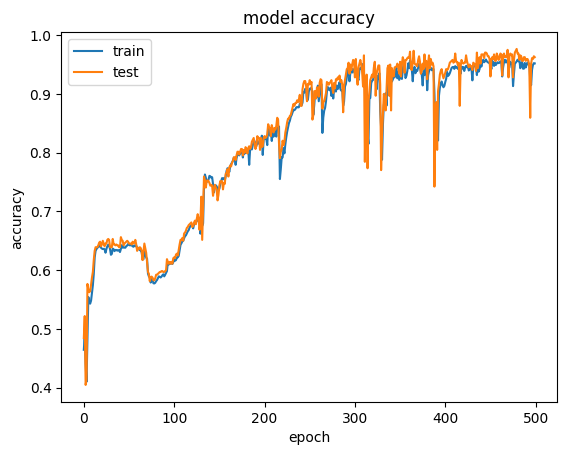

In [13]:
# summarize history for accuracy
plt.figure(1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

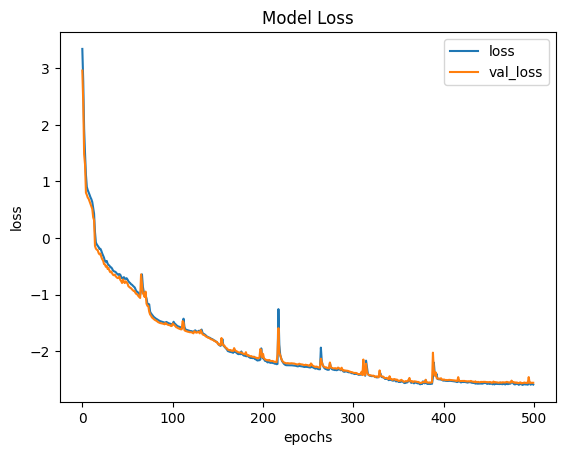

In [14]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

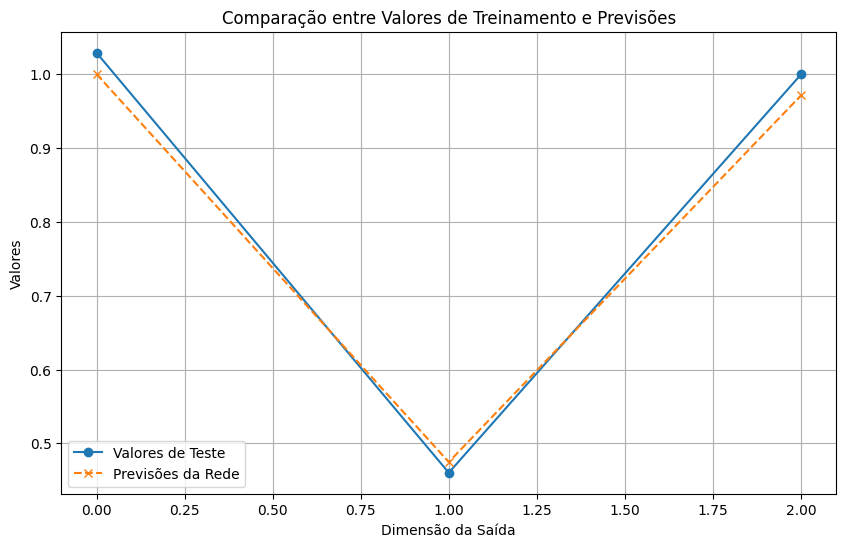

In [15]:
# Plote as duas linhas: valores de treinamento e previsões
plt.figure(figsize=(10, 6))
plt.plot(y_test[400], label='Valores de Teste', marker='o', linestyle='-')
plt.plot(y_pred[400], label='Previsões da Rede', marker='x', linestyle='--')
plt.xlabel('Dimensão da Saída')
plt.ylabel('Valores')
plt.legend()
plt.title('Comparação entre Valores de Treinamento e Previsões')
plt.grid(True)
plt.show()

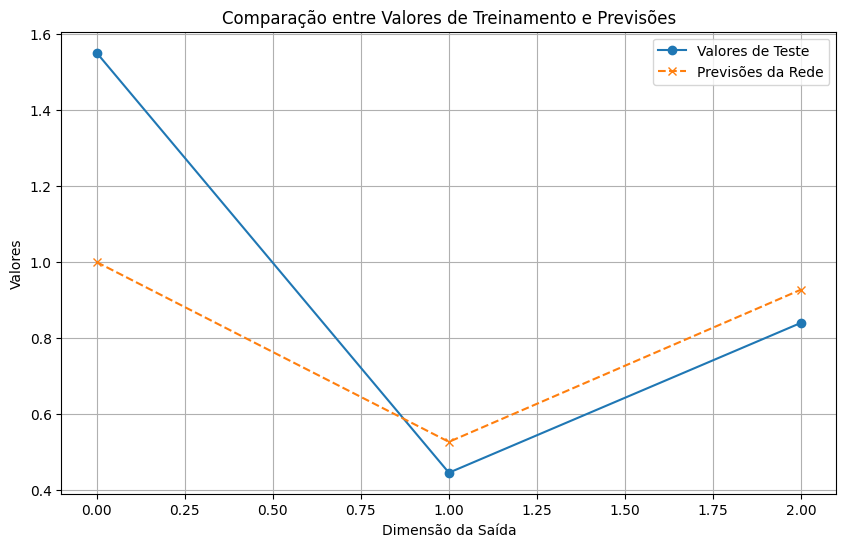

In [16]:
# Plote as duas linhas: valores de treinamento e previsões
plt.figure(figsize=(10, 6))
plt.plot(y_test[287], label='Valores de Teste', marker='o', linestyle='-')
plt.plot(y_pred[287], label='Previsões da Rede', marker='x', linestyle='--')
plt.xlabel('Dimensão da Saída')
plt.ylabel('Valores')
plt.legend()
plt.title('Comparação entre Valores de Treinamento e Previsões')
plt.grid(True)
plt.show()

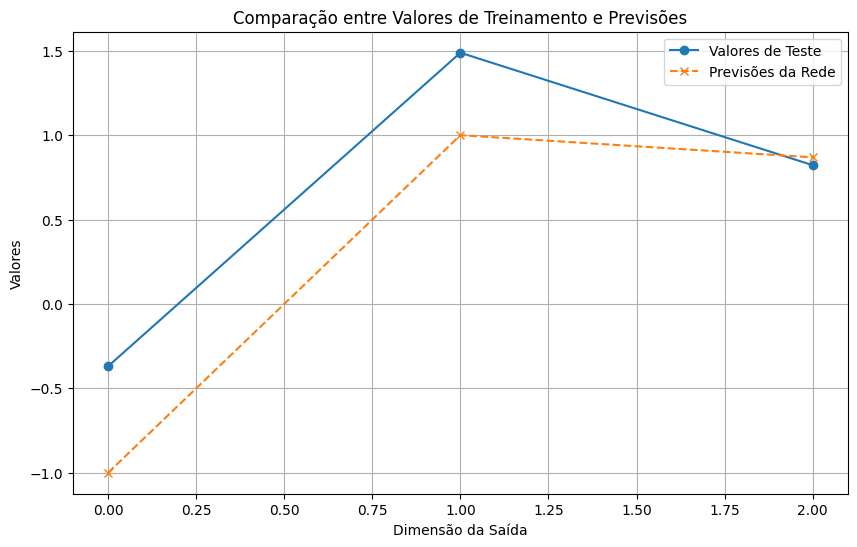

In [17]:
# Plote as duas linhas: valores de treinamento e previsões
plt.figure(figsize=(10, 6))
plt.plot(y_test[43], label='Valores de Teste', marker='o', linestyle='-')
plt.plot(y_pred[43], label='Previsões da Rede', marker='x', linestyle='--')
plt.xlabel('Dimensão da Saída')
plt.ylabel('Valores')
plt.legend()
plt.title('Comparação entre Valores de Treinamento e Previsões')
plt.grid(True)
plt.show()